## Installing packages and importing libraries

In [1]:
# Installing required packages
!pip install gradio pandas numpy matplotlib scikit-learn opencv-python pillow tf_keras pytesseract transformers tensorflow albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.6/290.6 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.

In [2]:
!pip install --upgrade tensorflow
!pip install --upgrade keras
!pip install --upgrade transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 48.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.1
    Uninstalling transformers-4.51.1:
      Successfully uninstalled transformers-4.51.1


In [3]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from transformers import DistilBertTokenizer, TFDistilBertModel

/usr/local/lib/python3.11/dist-packages/torch_xla/__init__.py:251: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


In [4]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from huggingface_hub import login
login()  # Will prompt for token interactively if run in notebook

# Uploading data

Dataset has been already augmented in another notebook and uploaded here after augmenting.

In [6]:
# Linking dataset paths
drive_path = '/content/drive/MyDrive/'
dataset_path = drive_path + 'memotion_dataset_7k/labels_augmented_v2.csv'
images_folder_path = drive_path + 'memotion_dataset_7k/images_aug/'

In [8]:
# Loading dataset
try:
    df = pd.read_csv(dataset_path)
    print("Dataset columns:", df.columns.tolist())
except Exception as e:
    print(f"Error loading dataset: {e}")
    raise

Dataset columns: ['Unnamed: 0', 'image_name', 'text_ocr', 'text_corrected', 'humour', 'sarcasm', 'offensive', 'motivational', 'overall_sentiment']


In [9]:
# Verifying image paths
df['image_path'] = images_folder_path + df['image_name']
print("\nSample image paths:")
print(df['image_path'].head())


Sample image paths:
0    /content/drive/MyDrive/memotion_dataset_7k/ima...
1    /content/drive/MyDrive/memotion_dataset_7k/ima...
2    /content/drive/MyDrive/memotion_dataset_7k/ima...
3    /content/drive/MyDrive/memotion_dataset_7k/ima...
4    /content/drive/MyDrive/memotion_dataset_7k/ima...
Name: image_path, dtype: object


# Checking data distribution

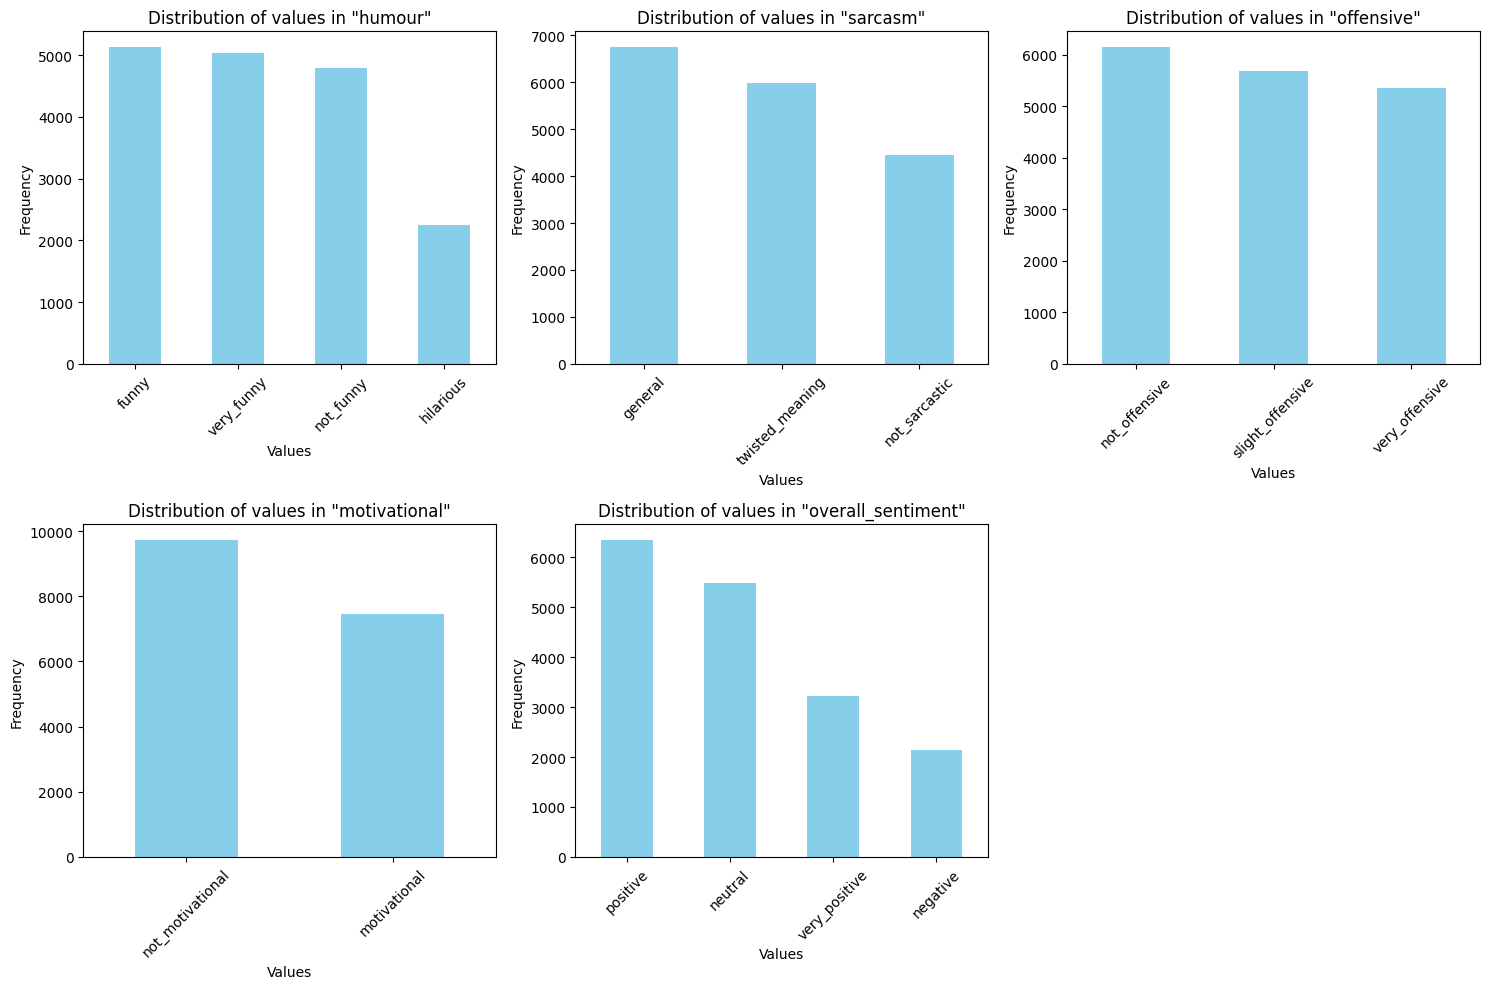

In [11]:
# Specifying columns to analyze
columns_to_plot = ['humour', 'sarcasm', 'offensive', 'motivational', 'overall_sentiment']

# Create subplots with 3 charts per row
fig, axes = plt.subplots(nrows=(len(columns_to_plot) + 2) // 3, ncols=3, figsize=(15, 10))  # Adjust the figure size
axes = axes.flatten()  # Flatten axes array for easy indexing

# Calculating and plotting the distribution of values in each specified column
for i, column in enumerate(columns_to_plot):
    if column in df.columns:
        value_counts = df[column].value_counts()

        # Plotting the distribution on the corresponding subplot
        value_counts.plot(kind='bar', color='skyblue', ax=axes[i])
        axes[i].set_title(f'Distribution of values in "{column}"')
        axes[i].set_xlabel('Values')
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=45)
    else:
        print(f"Column '{column}' not found in the dataset.")
        axes[i].axis('off')  # Turn off unused subplot if column is missing

# Hide unused subplots if any
for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')  # Turn off unused subplots

plt.tight_layout()
plt.show()


# Building preprocessing functions

In [14]:
# Text preprocessing function

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def preprocess_text(texts, max_length=128):
    return tokenizer(
        texts.tolist(),
        truncation=True,
        padding='max_length',
        max_length=max_length,
        return_tensors='tf'
    )

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [15]:
# Image preprocessing function (with TensorFlow-native error handling)

def safe_load(image_path):
    try:
        image = tf.io.read_file(image_path)
        image = tf.image.decode_image(image, channels=3, expand_animations=False)
        image = tf.image.resize(image, [224, 224])
        image = tf.keras.applications.efficientnet.preprocess_input(image)
        return image
    except:
        # Return a zero-initialized tensor of the same shape instead of None
        return tf.zeros((224, 224, 3), dtype=tf.float32)

In [16]:
# Ensuring image_paths and df are aligned
valid_indices = []
for i, image_name in enumerate(df['image_name']):
    image_path = os.path.join(images_folder_path, image_name)
    if os.path.exists(image_path):
        valid_indices.append(i)

# Filtering dataframe to include only valid indices
df = df.iloc[valid_indices].reset_index(drop=True)

# Rebuilding image_paths to match the filtered dataframe
image_paths = [os.path.join(images_folder_path, name) for name in df['image_name']]

# Preprocessing images

In [17]:
# Verifying TensorFlow installation
print("TensorFlow version:", tf.__version__)

# Verify image directory exists
assert os.path.exists(images_folder_path), f"Directory {images_folder_path} not found!"

# Creating image paths and verifying them
image_paths = [os.path.join(images_folder_path, name) for name in df['image_name']]

print("\nSample image paths:")
for path in image_paths[:5]:
    print(f"Exists: {os.path.exists(path)} → {path}")

TensorFlow version: 2.19.0

Sample image paths:
Exists: True → /content/drive/MyDrive/memotion_dataset_7k/images_aug/image_2_aug_0.jpeg
Exists: True → /content/drive/MyDrive/memotion_dataset_7k/images_aug/image_7_aug_0.png
Exists: True → /content/drive/MyDrive/memotion_dataset_7k/images_aug/image_12_aug_0.jpg
Exists: True → /content/drive/MyDrive/memotion_dataset_7k/images_aug/image_15_aug_0.jpg
Exists: True → /content/drive/MyDrive/memotion_dataset_7k/images_aug/image_16_aug_0.png


In [18]:
# Preprocessing images
def preprocess_image(image):
    """Ensure the image is RGB, even if it's grayscale"""
    # Convert grayscale images to RGB by repeating the channels
    if image.shape[-1] == 1:  # Grayscale image
        image = tf.image.grayscale_to_rgb(image)
    return image

def safe_load(image_path):
    """Load and preprocess image with error handling"""
    try:
        # Read and decode image
        image = tf.io.read_file(image_path)
        image = tf.image.decode_image(image, channels=3, expand_animations=False)  # Decode as RGB
        image = tf.image.resize(image, [224, 224])  # Resize to target dimensions
        image = preprocess_image(image)  # Ensure RGB format
        return tf.keras.applications.efficientnet.preprocess_input(image)
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return tf.zeros((224, 224, 3), dtype=tf.float32)  # Return empty image in case of error

# Creating image dataset
image_ds = tf.data.Dataset.from_tensor_slices(image_paths).map(
    lambda path: tf.py_function(safe_load, [path], Tout=tf.float32),
    num_parallel_calls=tf.data.AUTOTUNE
)

# Optionally suppress warnings if they're not critical
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow warnings

# Verifying the dataset
for image in image_ds.take(1):
    print(image.shape)  # Verify the shape of the images after preprocessing

(224, 224, 3)


# Preprocessing text

In [19]:
# Removing rows with NaN or empty strings in 'text_corrected'
df = df.dropna(subset=['text_corrected'])
df = df[df['text_corrected'] != ""]

# Converting all entries to strings (in case of numeric/None values)
df['text_corrected'] = df['text_corrected'].astype(str)

In [20]:
# Preprocessing text
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def preprocess_text(texts, max_length=128):
    return tokenizer(
        texts.tolist(),
        truncation=True,
        padding='max_length',
        max_length=max_length,
        return_tensors='tf'
    )

# Tokenizing text
tokenized_texts = preprocess_text(df['text_corrected'])

# Creating text dataset
text_ds = tf.data.Dataset.from_tensor_slices({
    'input_ids': tokenized_texts['input_ids'],
    'attention_mask': tokenized_texts['attention_mask']
})

In [21]:
# Veryfying images vs text and removing not matching ones
extra_images = []
for image_path in image_paths:
    image_name = os.path.basename(image_path)
    if image_name not in df['image_name'].values:
        extra_images.append(image_path)

filtered_image_paths = [path for path in image_paths if path not in extra_images]
image_paths = filtered_image_paths

# Verifying alignment
print(f"Final image dataset size: {len(image_paths)}")
print(f"Text dataset size: {len(df)}")
assert len(image_paths) == len(df), "Mismatch resolved!"

Final image dataset size: 10200
Text dataset size: 10200


# Creating label dataset

In [22]:
# Defining mappings for categorical columns
humour_mapping = {'not_funny': 0, 'funny': 1, 'very_funny': 2, 'hilarious': 3}
sarcasm_mapping = {'not_sarcastic': 0, 'general': 1, 'twisted_meaning': 2,}
offensive_mapping = {'not_offensive': 0, 'slight_offensive':1, 'very_offensive':2,}
motivational_mapping = {'not_motivational': 0, 'motivational': 1}
overall_sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2, 'very_positive': 3}

# Replaceing string values with numerical equivalents using the mappings
# Filling NaN values with a default category (e.g., 'not_sarcastic' for sarcasm)
df['humour'] = df['humour'].map(humour_mapping).fillna(0).astype(int)
df['sarcasm'] = df['sarcasm'].map(sarcasm_mapping).fillna(0).astype(int)
df['offensive'] = df['offensive'].map(offensive_mapping).fillna(0).astype(int)
df['motivational'] = df['motivational'].map(motivational_mapping).fillna(0).astype(int)
df['overall_sentiment'] = df['overall_sentiment'].map(overall_sentiment_mapping).fillna(0).astype(int)

# Creating the labels dataset with the mapped numerical values
labels_ds = tf.data.Dataset.from_tensor_slices({
    'humour': df['humour'].values,
    'sarcasm': df['sarcasm'].values,
    'offensive': df['offensive'].values,
    'motivational': df['motivational'].values,
    'overall_sentiment':df['overall_sentiment'].values
})

# Combining datasets

In [23]:
def ensure_shapes(example_inputs, example_labels):
    example_inputs['image_input'] = tf.ensure_shape(example_inputs['image_input'], [224, 224, 3])
    return example_inputs, example_labels

# Combining image, text and label datasets
full_ds = tf.data.Dataset.zip((text_ds, image_ds, labels_ds)).map(
    lambda text, img, labels: (
        {'input_ids': text['input_ids'], 'attention_mask': text['attention_mask'], 'image_input': img},
        {'humour': labels['humour'], 'sarcasm': labels['sarcasm'], 'offensive': labels['offensive'], 'motivational': labels['motivational'], 'overall_sentiment': labels['overall_sentiment']}
    )
).map(ensure_shapes)  # Applying the ensure_shapes function to fix image input shapes

# Shuffle and split the dataset

In [24]:
# Shuffling datasets and splitting into train, validate, and test parts
dataset_size = len(df)
train_size = int(0.8 * dataset_size)
val_size = int(0.1 * dataset_size)

buffer_size = 9000  # Adjust this value as needed

full_ds = full_ds.shuffle(buffer_size=buffer_size)
train_ds = full_ds.take(train_size)
remaining = full_ds.skip(train_size)
val_ds = remaining.take(val_size)
test_ds = remaining.skip(val_size)

# Batch and optimize the datasets

In [25]:
# Batching the dataset and optimising
BATCH_SIZE = 64
train_ds = train_ds.cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

# Verifying batch structure


In [26]:
# Verifying batch structure
for batch in train_ds.take(1):
    inputs, labels = batch
    print("Input IDs shape:", inputs['input_ids'].shape)  # (8, 128)
    print("Image shape:", inputs['image_input'].shape)    # (8, 224, 224, 3)
    print("Humour labels shape:", labels['humour'].shape)   # (8,)

Input IDs shape: (64, 128)
Image shape: (64, 224, 224, 3)
Humour labels shape: (64,)


# Building the model

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers
from transformers import TFDistilBertModel

# Defining constants
TEXT_SEQ_LENGTH = 128
IMAGE_SIZE = 224

# Custom DistilBERT wrapper
class DistilBertEncoder(tf.keras.layers.Layer):
    def __init__(self, model_name='distilbert-base-uncased', **kwargs):
        super().__init__(**kwargs)
        self.bert = TFDistilBertModel.from_pretrained(model_name)
        self.bert.trainable = False  # Set to True to fine-tune

    def call(self, inputs):
        input_ids, attention_mask = inputs
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        return output.last_hidden_state[:, 0, :]  # [CLS] token


In [28]:
# Text Input
input_ids = layers.Input(shape=(TEXT_SEQ_LENGTH,), dtype=tf.int32, name='input_ids')
attention_mask = layers.Input(shape=(TEXT_SEQ_LENGTH,), dtype=tf.int32, name='attention_mask')
text_features = DistilBertEncoder()([input_ids, attention_mask])

# Image Input
image_input = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3), name='image_input')
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)
)
base_model.trainable = False
image_features = layers.GlobalAveragePooling2D()(base_model(image_input))

# Combining inputs
combined = layers.Concatenate()([text_features, image_features])
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(combined)
x = layers.BatchNormalization()(x)
# 👇 No dropout here

# Defining outputs
outputs = {
    'humour': layers.Dense(4, activation='softmax', name='humour')(x),
    'sarcasm': layers.Dense(3, activation='softmax', name='sarcasm')(x),
    'offensive': layers.Dense(3, activation='softmax', name='offensive')(x),
    'motivational': layers.Dense(2, activation='softmax', name='motivational')(x),
    'overall_sentiment': layers.Dense(4, activation='softmax', name='overall_sentiment')(x)
}

# Final model
model = Model(inputs=[input_ids, attention_mask, image_input], outputs=outputs)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
model.compile(
    optimizer='adam',
    loss={
        'humour': 'sparse_categorical_crossentropy',
        'sarcasm': 'sparse_categorical_crossentropy',
        'offensive': 'sparse_categorical_crossentropy',
        'motivational': 'sparse_categorical_crossentropy',
        'overall_sentiment': 'sparse_categorical_crossentropy'
    },
    metrics={
        'humour': 'accuracy',
        'sarcasm': 'accuracy',
        'offensive': 'accuracy',
        'motivational': 'accuracy',
        'overall_sentiment': 'accuracy'
    }
)

# Training and saving the model

In [30]:
# Training the model with basic settings and 8 epochs
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=8
)

# Saving the entire model
model.save("/content/drive/MyDrive/AI_Models/meme_final_model_aug.keras")

Epoch 1/8
128/128 ━━━━━━━━━━━━━━━━━━━━ 2328s 18s/step - humour_accuracy: 0.3016 - humour_loss: 1.5931 - loss: 10.6612 - motivational_accuracy: 0.5404 - motivational_loss: 0.8191 - offensive_accuracy: 0.3757 - offensive_loss: 1.2748 - overall_sentiment_accuracy: 0.3045 - overall_sentiment_loss: 1.6027 - sarcasm_accuracy: 0.3609 - sarcasm_loss: 1.2878 - val_humour_accuracy: 0.4324 - val_humour_loss: 1.2457 - val_loss: 7.8986 - val_motivational_accuracy: 0.6422 - val_motivational_loss: 0.6411 - val_offensive_accuracy: 0.4755 - val_offensive_loss: 1.0406 - val_overall_sentiment_accuracy: 0.4078 - val_overall_sentiment_loss: 1.2490 - val_sarcasm_accuracy: 0.4520 - val_sarcasm_loss: 1.0905
Epoch 2/8
128/128 ━━━━━━━━━━━━━━━━━━━━ 2244s 18s/step - humour_accuracy: 0.4656 - humour_loss: 1.2000 - loss: 7.3894 - motivational_accuracy: 0.6127 - motivational_loss: 0.6481 - offensive_accuracy: 0.4803 - offensive_loss: 1.0179 - overall_sentiment_accuracy: 0.4504 - overall_sentiment_loss: 1.2192 - sarc

# Evaluating the model with confusion matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 10s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 10s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 10s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 10s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 10s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 10s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 12s/step
--- HUMOUR ---
              precision    recall  f1-score   support

           0       0.55      0.65      0.60       302
           1       0.46      0.62      0.53       290
           2       0.56      0.54      0.55       277
           3       0.93      0.09      0.17       151

    accuracy                           0.53      1020
   macro avg       0.63      0.47      0.46      1020
weight

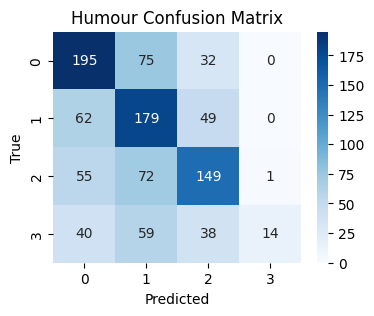

--- SARCASM ---
              precision    recall  f1-score   support

           0       0.36      0.93      0.52       298
           1       0.82      0.03      0.05       343
           2       0.70      0.45      0.55       379

    accuracy                           0.45      1020
   macro avg       0.63      0.47      0.37      1020
weighted avg       0.64      0.45      0.37      1020



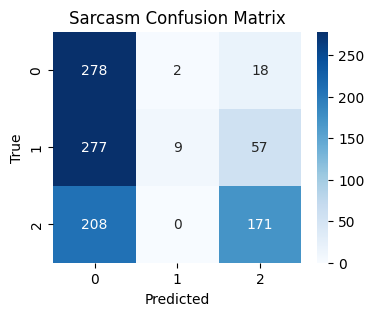

--- OFFENSIVE ---
              precision    recall  f1-score   support

           0       0.50      0.79      0.61       346
           1       0.76      0.18      0.30       289
           2       0.64      0.67      0.65       385

    accuracy                           0.57      1020
   macro avg       0.63      0.55      0.52      1020
weighted avg       0.63      0.57      0.54      1020



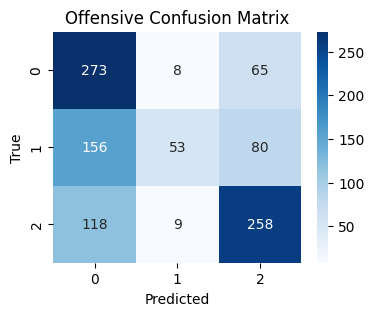

--- MOTIVATIONAL ---
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       513
           1       0.74      0.64      0.69       507

    accuracy                           0.71      1020
   macro avg       0.71      0.71      0.71      1020
weighted avg       0.71      0.71      0.71      1020



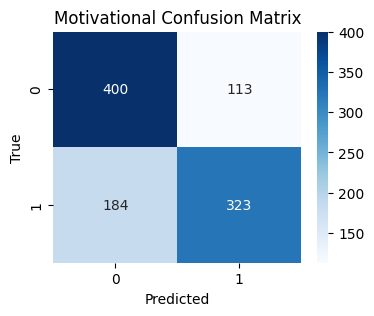

--- OVERALL_SENTIMENT ---
              precision    recall  f1-score   support

           0       0.56      0.36      0.44       147
           1       0.50      0.76      0.60       346
           2       0.53      0.56      0.55       300
           3       0.70      0.24      0.36       227

    accuracy                           0.53      1020
   macro avg       0.57      0.48      0.49      1020
weighted avg       0.56      0.53      0.51      1020



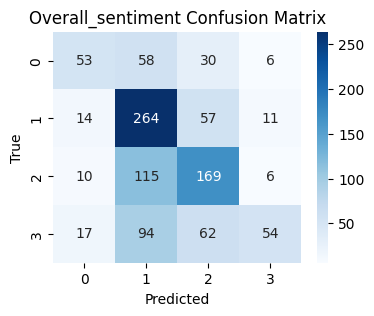

In [33]:
# Getting true labels and predicted labels
y_true = {label: [] for label in ['humour', 'sarcasm', 'offensive', 'motivational', 'overall_sentiment']}
y_pred = {label: [] for label in ['humour', 'sarcasm', 'offensive', 'motivational', 'overall_sentiment']}

label_names = ['humour', 'sarcasm', 'offensive', 'motivational', 'overall_sentiment']

for images, labels in test_ds:
    preds = model.predict(images)
    # Access labels and predictions using keys instead of indices
    for label_name in label_names:
        y_true[label_name].extend(labels[label_name].numpy())
        # Access predictions using the label name directly
        y_pred[label_name].extend(np.argmax(preds[label_name], axis=1))

# Evaluating each class
for label in label_names:
    print(f"--- {label.upper()} ---")
    print(classification_report(y_true[label], y_pred[label]))

    cm = confusion_matrix(y_true[label], y_pred[label])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{label.capitalize()} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [35]:
# Evaluation metrics without the confusion matrix

from sklearn.metrics import classification_report
import numpy as np

# Getting true labels and predicted labels
y_true = {label: [] for label in ['humour', 'sarcasm', 'offensive', 'motivational', 'overall_sentiment']}
y_pred = {label: [] for label in ['humour', 'sarcasm', 'offensive', 'motivational', 'overall_sentiment']}

label_names = ['humour', 'sarcasm', 'offensive', 'motivational', 'overall_sentiment']

for images, labels in test_ds:
    preds = model.predict(images)
    for label_name in label_names:
        y_true[label_name].extend(labels[label_name].numpy())
        y_pred[label_name].extend(np.argmax(preds[label_name], axis=1))

# Evaluating each class and printing metrics
for label in label_names:
    print(f"--- {label.upper()} ---")
    print(classification_report(y_true[label], y_pred[label], digits=4))
    print("\n" + "="*50 + "\n")

2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 10s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 10s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 10s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 10s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 10s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 10s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 10s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 8s/step
--- HUMOUR ---
              precision    recall  f1-score   support

           0     0.5639    0.6737    0.6139       334
           1     0.4377    0.6089    0.5093       271
           2     0.6061    0.5364    0.5691       261
           3     0.8462    0.0714    0.1317       154

    accuracy                         0.5304      1020
   macro avg     0.6134    0.4726    0.4560      1020
weight

In [64]:
# Saving the entire model again (just in case :)
model.save("/content/drive/MyDrive/AI_Models/meme_final_model_aug3.keras")

# Gradio Prototyping

In [38]:
!pip install gradio pytesseract

In [40]:
# Installing Tesseract-OCR
!sudo apt-get update
!sudo apt-get install -y tesseract-ocr

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [73.0 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,243 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,837 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,788 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packag

In [41]:
import gradio as gr
import pytesseract
from PIL import Image

pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [42]:
# Testing OCR with a sample image
def test_ocr():
    img = Image.open("/content/drive/MyDrive/memotion_dataset_7k/images/image_333.jpg")
    text = pytesseract.image_to_string(img)
    print("Extracted Text:", text)

test_ocr()

Extracted Text: EL Arnage ¥

~ SHOULD | CALL
YOU? OR SHOULD

_WE RESOLVE ITW/__
A QUICK 200 TEXTS

 



In [87]:
import numpy as np
import tensorflow as tf
from transformers import DistilBertTokenizer
from PIL import Image
import pytesseract
import gradio as gr

# Loading tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Classifying labels
class_names = {
    'humour': ['😐 Not Funny', '🙂 Funny', '😆 Very Funny', '🤣 Hilarious'],
    'sarcasm': ['🧐 Not Sarcastic', '😏 General Sarcasm', '🤨 Twisted Meaning'],
    'offensive': ['✅ Not Offensive', '⚠️ Slightly Offensive', '🚫 Offensive'],
    'motivational': ['🙃 Not Motivational', '💡 Motivational'],
    'overall_sentiment': ['🙁 Negative', '😐 Neutral', '🙂 Positive', '🌟 Very Positive']
}

# OCR function
def extract_text_from_image(img):
    try:
        gray_img = img.convert('L')
        text = pytesseract.image_to_string(gray_img)
        return text.strip()
    except Exception as e:
        return f"OCR Error: {str(e)}"

# Text preprocessing
def preprocess_text(text):
    return tokenizer(
        text,
        truncation=True,
        padding='max_length',
        max_length=128,
        return_tensors='tf'
    )

# Main prediction function
def predict_meme(input_image, user_text=None):
    try:
        image_text = extract_text_from_image(input_image)
        full_text = f"{image_text} {user_text}" if user_text else image_text

        img = input_image.resize((224, 224))
        img_array = np.array(img) / 255.0
        if img_array.shape[-1] != 3:
            img_array = img_array[..., :3]
        img_array = img_array.reshape(1, 224, 224, 3)

        text_encoded = preprocess_text([full_text])

        predictions = model.predict([
            text_encoded['input_ids'],
            text_encoded['attention_mask'],
            img_array
        ])

        # Use correct unpacking
        humour_pred = predictions['humour']
        sarcasm_pred = predictions['sarcasm']
        offensive_pred = predictions['offensive']
        motivational_pred = predictions['motivational']
        overall_sentiment_pred = predictions['overall_sentiment']

        # Debug print
        print("Humour prediction:", humour_pred)
        print("Sarcasm prediction:", sarcasm_pred)
        print("Offensive prediction:", offensive_pred)
        print("Motivational prediction:", motivational_pred)
        print("Overall sentiment prediction:", overall_sentiment_pred)

        # Get highest-probability index for each
        humour_idx = np.argmax(humour_pred[0])
        sarcasm_idx = np.argmax(sarcasm_pred[0])
        offensive_idx = np.argmax(offensive_pred[0])
        motivational_idx = np.argmax(motivational_pred[0])
        overall_sentiment_idx = np.argmax(overall_sentiment_pred[0])

        return (
            class_names['humour'][humour_idx],
            class_names['sarcasm'][sarcasm_idx],
            class_names['offensive'][offensive_idx],
            class_names['motivational'][motivational_idx],
            class_names['overall_sentiment'][overall_sentiment_idx]
        )

    except Exception as e:
        return str(e), "", "", "", ""

# Gradio UI
iface = gr.Interface(
    fn=predict_meme,
    inputs=[
        gr.Image(type="pil", label="Upload Meme Image")
    ],
    outputs=[
        gr.Label(label="Humour"),
        gr.Label(label="Sarcasm"),
        gr.Label(label="Offensive"),
        gr.Label(label="Motivational"),
        gr.Label(label="Overall Sentiment")
    ],
    title="🧠 Meme-o-Meter: AI Sentiment Classifier for Memes",
    description="Upload a meme and receive predictions across 5 emotional dimensions."
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a92b9089295d3987f7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
